### 2.3	Employee Turnover Dataset 

In [14]:
#Importing all neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
# Read the CSV file into a DataFrame
df = pd.read_csv("employee_turnover.csv")

# Check for any missing values in the DataFrame
df.isnull().values.any()

# Print the DataFrame and check for missing values
df.head()

,job_satisfaction_level,salary_satisfaction_level,satisfaction_with_team_leader,score_last_evaluation,overtime_in_a_week,average_working_hours_monthly,time_spend_company,work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.36,2,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.91,4,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.13,2,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.86,4,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.32,1,0.52,2,159,3,0,1,0,sales,low


In [16]:
# Convert categorical data types into numeric equivalents
df['Department'] = pd.Categorical(df['Department']).codes
df['salary'] = pd.Categorical(df['salary']).codes

df.dtypes

job_satisfaction_level           float64
salary_satisfaction_level        float64
satisfaction_with_team_leader      int64
score_last_evaluation            float64
overtime_in_a_week                 int64
average_working_hours_monthly      int64
time_spend_company                 int64
work_accident                      int64
left                               int64
promotion_last_5years              int64
Department                          int8
salary                              int8
dtype: object

### What is the average job satisfaction level of employees who left FAU Airlines?

In [17]:
# What is the average job satisfaction level of employees who left FAU Airlines?
avg_job_satisfaction_left = df[df['left'] == 1]['job_satisfaction_level'].mean()
print(f"Average Job Satisfaction Level of Employees Who Left: {avg_job_satisfaction_left:.2f}")

Average Job Satisfaction Level of Employees Who Left: 0.44


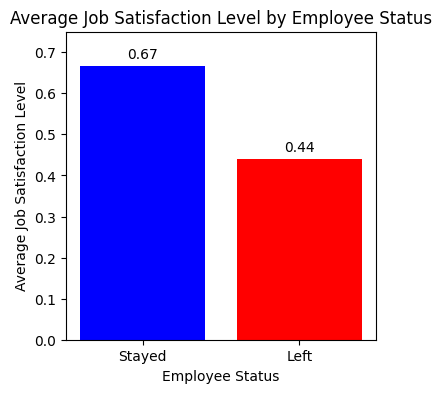

In [18]:
# Plot Bar graph for Average Job Satisfaction Level by Employee Status
values = df.groupby('left')['job_satisfaction_level'].mean()

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(4, 4))
bars = ax.bar(values.index, values, color=['blue', 'red'])

# Adding annotations to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')

# Adjust plot properties
ax.set_xticks(values.index)
ax.set_xticklabels(['Stayed', 'Left'])
plt.title('Average Job Satisfaction Level by Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Average Job Satisfaction Level')
plt.ylim(0,0.75)
# Show the plot
plt.show()


### What is the average salary satisfaction level of employees who left FAU Airlines?

In [19]:
# What is the average salary satisfaction level of employees who left FAU Airlines?
avg_salary_satisfaction_left = df[df['left'] == 1]['salary_satisfaction_level'].mean()
print(f"Average Salary Satisfaction Level of Employees Who Left: {avg_salary_satisfaction_left:.2f}")

Average Salary Satisfaction Level of Employees Who Left: 0.50


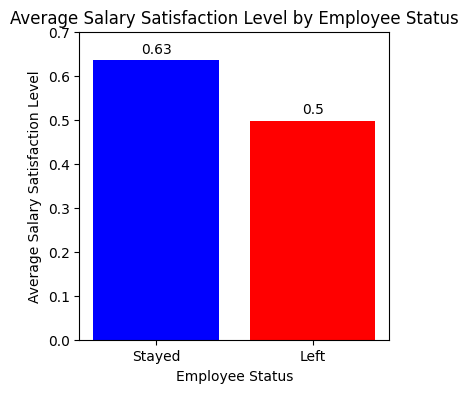

In [20]:
# Plot Bar graph for Average Salary Satisfaction Level by Employee Status
values = df.groupby('left')['salary_satisfaction_level'].mean()

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(4, 4))
bars = ax.bar(values.index, values, color=['blue', 'red'])

# Adding annotations to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')

# Adjust plot properties
ax.set_xticks(values.index)
ax.set_xticklabels(['Stayed', 'Left'])
plt.title('Average Salary Satisfaction Level by Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Average Salary Satisfaction Level')
plt.ylim(0,0.7)
# Show the plot
plt.show()


### For how long have employees who have left, stayed with FAU Airlines?

In [21]:
# For how long have employees who have left, stayed with FAU Airlines?
avg_time_spend_left = df[df['left'] == 1]['time_spend_company'].mean()
print(f"Average Time Spent with FAU Airlines for Employees Who Left: {avg_time_spend_left:.2f} years")


Average Time Spent with FAU Airlines for Employees Who Left: 3.88 years


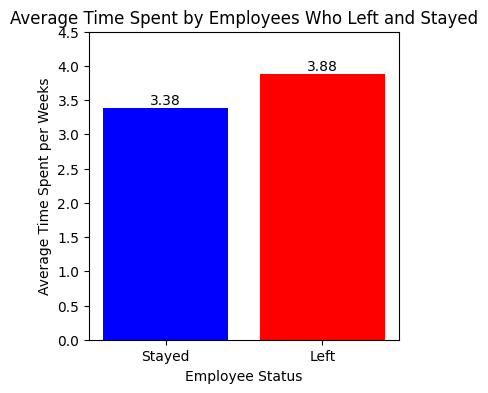

In [22]:
# Plot Bar Graph for the Average Time Spent with FAU Airlines by Employees
values = df.groupby('left')['time_spend_company'].mean()

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(4, 4))
bars = ax.bar(values.index, values, color=['blue', 'red'])

# Adding annotations to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')

# Adjust plot properties
ax.set_xticks(values.index)
ax.set_xticklabels(['Stayed', 'Left'])
plt.title('Average Time Spent by Employees Who Left and Stayed')
plt.xlabel('Employee Status')
plt.ylabel('Average Time Spent per Weeks')
plt.ylim(0,4.5)
# Show the plot
plt.show()


### Does salary play a role for people who decide to quit their job?

In [23]:
# Does salary play a role for people who decide to quit their job?
salary_effect_on_turnover = df[df['left'] == 1]['salary'].mean()
print("\nSalary Effect on Turnover:",salary_effect_on_turnover)


Salary Effect on Turnover: 1.3458415009801177


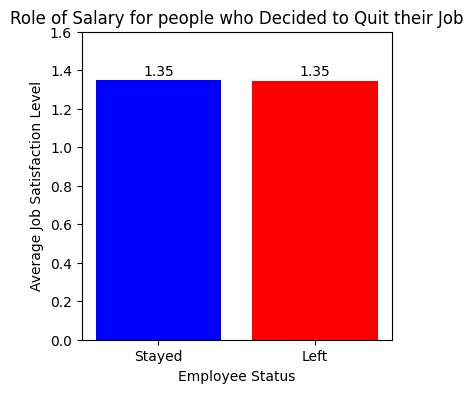

In [24]:
# Plot Bar Graph for the Role of Salary for people who Decided to Quit their Job
values = df.groupby('left')['salary'].mean()

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(4, 4))
bars = ax.bar(values.index, values, color=['blue', 'red'])

# Adding annotations to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black')

# Adjust plot properties
ax.set_xticks(values.index)
ax.set_xticklabels(['Stayed', 'Left'])
plt.title('Role of Salary for people who Decided to Quit their Job')
plt.xlabel('Employee Status')
plt.ylabel('Average Job Satisfaction Level')
plt.ylim(0,1.6)
# Show the plot
plt.show()


### With which attributes is the label column left highly correlated to? Print a correlation matrix?

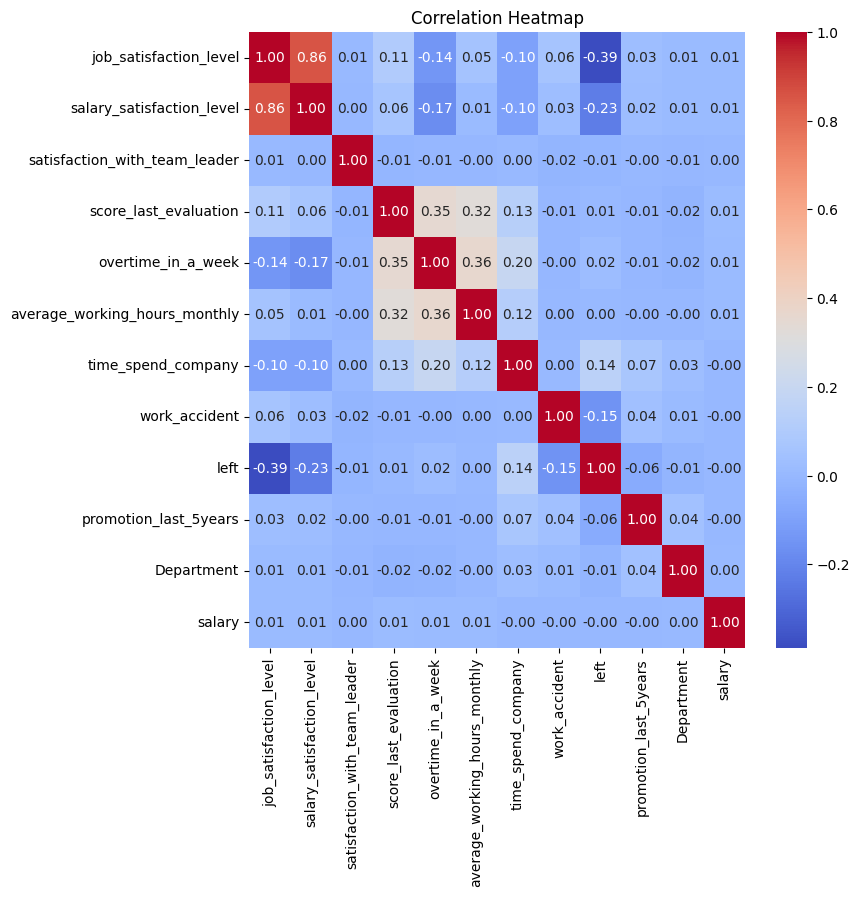

In [25]:
correlation_matrix = df.corr()
correlation_with_left = abs(correlation_matrix['left']).sort_values(ascending=False)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# 2.4	Turnover Prediction 

To develop a predictive model for employee turnover, the choice of a machine learning algorithm is crucial. For this particular scenario, Logistic Regression, a widely used algorithm for binary classification tasks, is selected. Logistic Regression is well-suited for predicting binary outcomes, specifically discerning whether an employee will either leave (1) or stay (0).

In [26]:
# Assume X as target column, and other columns Y as features
X = df.drop('left', axis=1)
y = df['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model with increased max_iter and 'liblinear' solver
model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.80
Confusion Matrix:
[[2131  163]
 [ 445  261]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2294
           1       0.62      0.37      0.46       706

    accuracy                           0.80      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.78      0.80      0.78      3000



### Explanation:

- Logistic Regression is chosen for its simplicity and interpretability, making it a good starting point for binary classification problems.
- Features used for prediction are assumed to be all columns except the 'left' column.
- The data is split into training and testing sets for model evaluation.
- The model is trained on the training set and evaluated on the testing set.
- Evaluation metrics include accuracy, confusion matrix, and classification report.

### Interpretation:

- The accuracy tells us the overall correct prediction rate.
- The confusion matrix provides information on true positives, true negatives, false positives, and false negatives.
- The classification report includes precision, recall, and F1-score for each class.

### Analysis and Retention Strategies:

- Analyze the feature importance to understand which factors contribute most to employee turnover.
- Identify patterns and reasons behind employee turnover through data exploration.
- Retention strategies may include improving job satisfaction, addressing salary concerns, providing career development opportunities, and fostering a positive work environment.

### Conclusion:
This is a basic model, and further refinement and exploration are necessary for a comprehensive analysis. It's important to consider domain knowledge, explore more complex models, and address potential imbalances in the dataset.